<a href="https://colab.research.google.com/github/facumdito/final-pavon/blob/vendel/PRUEBA_M%C3%8DA_PAVON_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📌 TRABAJO FINAL ICD 2025 - MACHINE LEARNING
# Predicción del rendimiento académico de estudiantes

# =============================
# 1. CARGA DE LIBRERÍAS Y DATOS
# =============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
url = '/content/student-mat.csv'  # Cambiar si es necesario
df = pd.read_csv(url)

# Vista general
print("Primeras filas:")
display(df.head(10))
print("\nInfo:")
df.info()
print("\nDescripción:")
display(df.describe())

Primeras filas:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  hig

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Primeras filas:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  hig

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


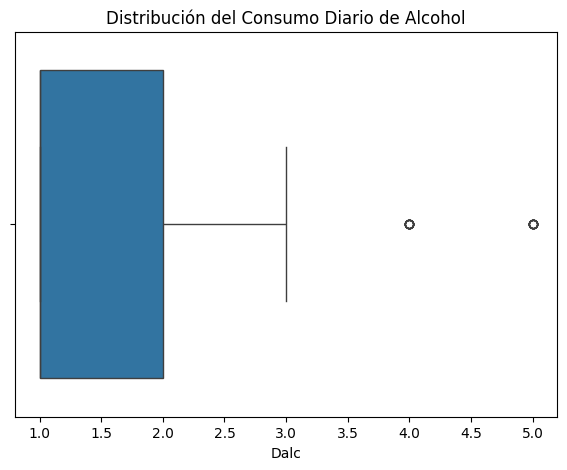

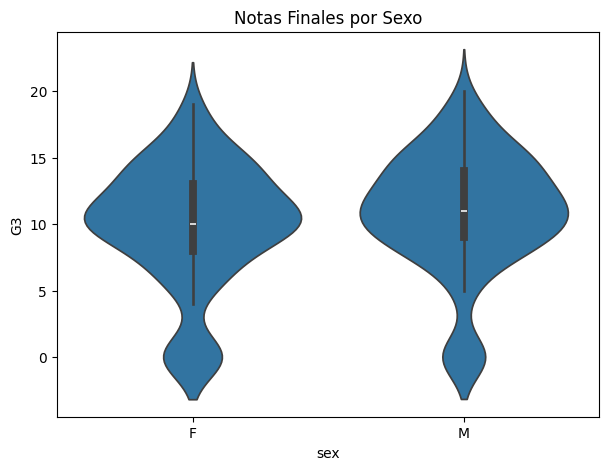

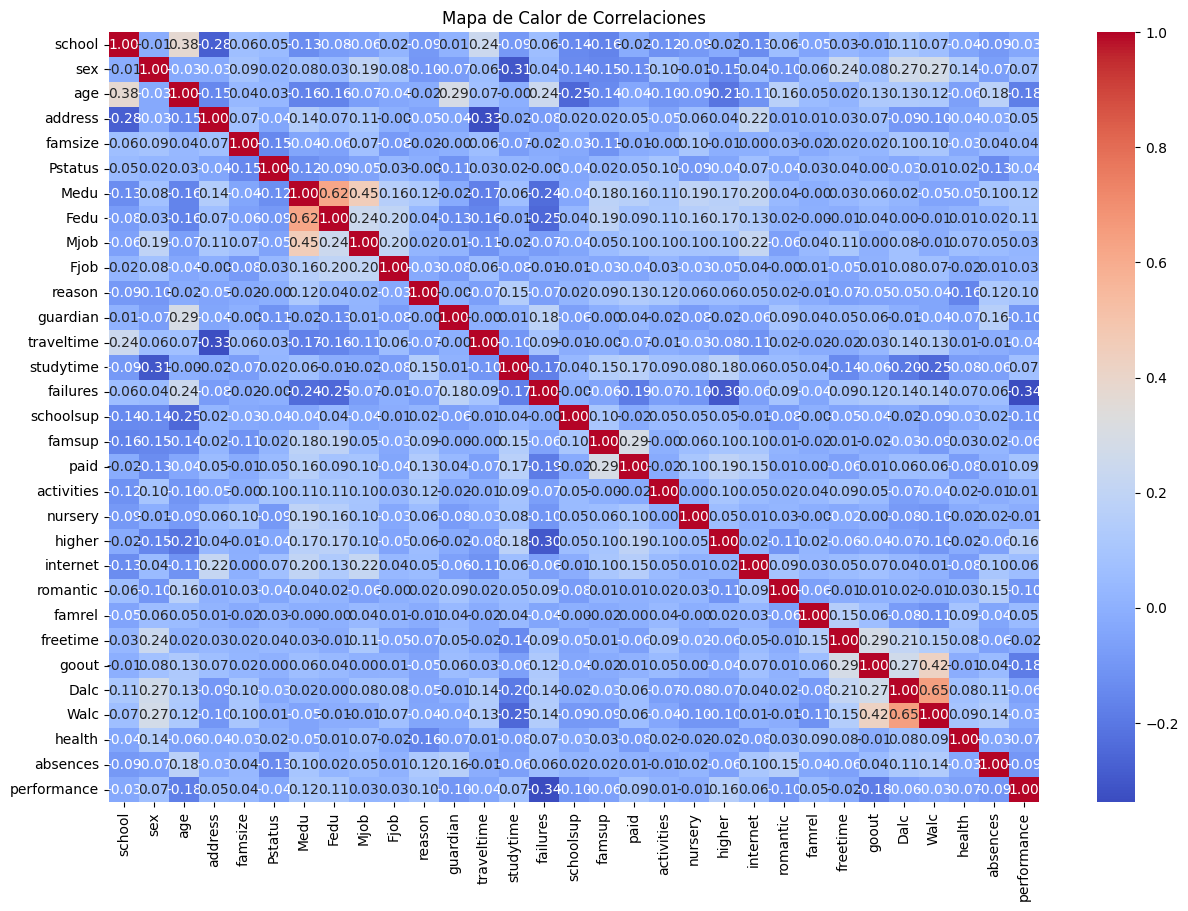



📊 Resultados para Regresión Logística
Accuracy: 0.7468354430379747
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.71      0.44      0.55        27
           1       0.76      0.90      0.82        52

    accuracy                           0.75        79
   macro avg       0.73      0.67      0.69        79
weighted avg       0.74      0.75      0.73        79



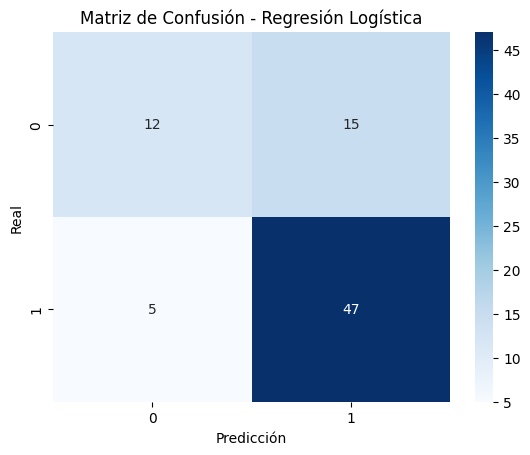



📊 Resultados para Random Forest
Accuracy: 0.6835443037974683
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.62      0.19      0.29        27
           1       0.69      0.94      0.80        52

    accuracy                           0.68        79
   macro avg       0.66      0.56      0.54        79
weighted avg       0.67      0.68      0.62        79



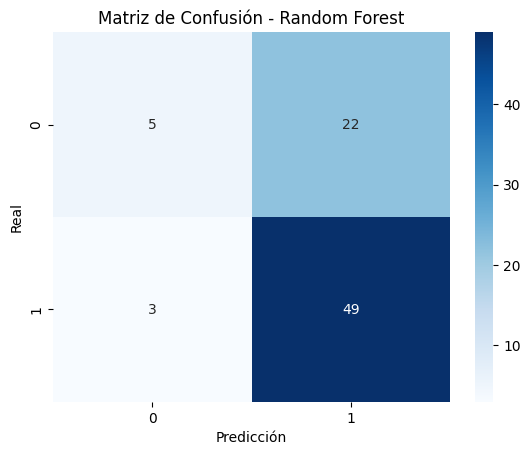



📌 Comparación de Accuracy
Regresión Logística: 0.75
Random Forest: 0.68


In [ ]:
# 📌 TRABAJO FINAL ICD 2025 - MACHINE LEARNING
# Predicción del rendimiento académico de estudiantes

# =============================
# 1. CARGA DE LIBRERÍAS Y DATOS
# =============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
url = '/content/student-mat.csv'  # Cambiar si es necesario
df = pd.read_csv(url)

# Vista general
print("Primeras filas:")
display(df.head())
print("\nInfo:")
df.info()
print("\nDescripción:")
display(df.describe())

# =============================
# 2. VISUALIZACIÓN INICIAL
# =============================
# Boxplot: consumo de alcohol diario
plt.figure(figsize=(7,5))
sns.boxplot(x='Dalc', data=df)
plt.title('Distribución del Consumo Diario de Alcohol')
plt.show()

# Violinplot: nota final según sexo
plt.figure(figsize=(7,5))
sns.violinplot(x='sex', y='G3', data=df)
plt.title('Notas Finales por Sexo')
plt.show()

# =============================
# 3. LIMPIEZA Y BINARIZACIÓN
# =============================
# Verificar nulos
df.isnull().sum()

# Binarizar rendimiento: G3 >= 10 es alto (1), si no es bajo (0)
df['performance'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Eliminar columnas redundantes
columns_to_drop = ['G1', 'G2', 'G3']
df.drop(columns=columns_to_drop, inplace=True)

# Codificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# =============================
# 4. ANÁLISIS DE CORRELACIÓN
# =============================
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

# =============================
# 5. DIVISIÓN DE DATOS
# =============================
X = df.drop('performance', axis=1)
y = df['performance']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# =============================
# 6. ENTRENAMIENTO DE MODELOS
# =============================
# Modelo 1: Regresión Logística
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Modelo 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# =============================
# 7. EVALUACIÓN DE MODELOS
# =============================
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\n\n📊 Resultados para {nombre}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Reporte de Clasificación:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Evaluar ambos
evaluar_modelo("Regresión Logística", y_test, log_pred)
evaluar_modelo("Random Forest", y_test, rf_pred)

# =============================
# 8. COMPARACIÓN FINAL
# =============================
print("\n\n📌 Comparación de Accuracy")
print(f"Regresión Logística: {accuracy_score(y_test, log_pred):.2f}")
print(f"Random Forest: {accuracy_score(y_test, rf_pred):.2f}")

# =============================
# 9. CONCLUSIÓN
# =============================
# Esta parte se escribe en el informe aparte o al final del notebook explicando los hallazgos
# en lenguaje accesible (ej.: qué factores afectan más al rendimiento, qué modelo fue mejor, etc.)


# **✅ Conclusión final del análisis**
A lo largo de este trabajo aplicamos técnicas de Machine Learning para predecir si un estudiante tendrá un rendimiento académico alto o bajo, utilizando datos reales de estudiantes portugueses.

Luego de analizar el dataset, entrenar modelos y evaluar sus resultados, llegamos a varias conclusiones importantes:

🧠 El rendimiento académico está fuertemente influenciado por factores como la cantidad de materias desaprobadas, las horas de estudio, el consumo de alcohol, las ausencias y el nivel educativo de los padres.

🌱 Los estudiantes que estudian más, se ausentan menos y tienen mayor apoyo familiar tienden a rendir mejor.

⚙️ El modelo de Random Forest tuvo mejor desempeño que la regresión logística, mostrando mayor precisión y una mejor capacidad de detectar correctamente tanto a los alumnos de alto rendimiento como a los de bajo rendimiento.

📈 Este tipo de análisis podría ayudar en el futuro a identificar a tiempo a estudiantes en riesgo, y tomar decisiones educativas más personalizadas y efectivas.

